In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
a=pd.read_csv("G:/TCs ion intership/activity report/datasets/webmd.csv")

Shape of dataframe

In [4]:
a.shape

(362806, 12)

In [5]:
a.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

Checking for null values,NAN values

In [6]:
a.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [7]:
a['Reviews'].mode()

0     
dtype: object

In [8]:
a['Reviews'].value_counts().sort_values(ascending=False).head(10)

                                                                                                                                                                                                                                                                                                                          41824
good                                                                                                                                                                                                                                                                                                                        183
this treatment is awsome.  I love drugs.                                                                                                                                                                                                                                                                                    172
This drug is awesome.  I love drugs.    

There no frequent or common reviews so dropping 37 as this is very large dataset

In [9]:
d=a.dropna()

In [10]:
d

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [11]:
d.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

Checking for blank spaces in category columns

In [12]:
for i in (d.columns):
    v=d[i].nunique()
    print("The columns {} has {} uninque values".format(i,v))

The columns Age has 12 uninque values
The columns Condition has 1805 uninque values
The columns Date has 4524 uninque values
The columns Drug has 7093 uninque values
The columns DrugId has 6572 uninque values
The columns EaseofUse has 7 uninque values
The columns Effectiveness has 7 uninque values
The columns Reviews has 250167 uninque values
The columns Satisfaction has 7 uninque values
The columns Sex has 3 uninque values
The columns Sides has 1651 uninque values
The columns UsefulCount has 148 uninque values


In [13]:
d['Age'].value_counts()

45-54         80032
55-64         75129
35-44         55010
25-34         49705
65-74         41215
19-24         24230
75 or over    15225
              12199
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [14]:
d['Sides'].value_counts()

                                                                                                                                                       17454
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15560
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9158
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

Here we have 17454 blank space which will be replaced by mode/ frequent categorical value

In [15]:
d.columns


Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [16]:
d['Condition'].value_counts().head(10)

Other                                            49758
Pain                                             25225
High Blood Pressure                              23271
Depression                                       14509
Birth Control                                    12253
Neuropathic Pain                                  8988
Type 2 Diabetes Mellitus                          7647
Chronic Trouble Sleeping                          7406
Attention Deficit Disorder with Hyperactivity     6801
Bipolar Depression                                5946
Name: Condition, dtype: int64

In [17]:
d['Date'].value_counts().head(10)

10/29/2007    404
10/30/2007    316
10/28/2007    315
3/15/2010     308
3/16/2010     295
10/25/2007    289
10/26/2007    283
9/18/2007     278
1/15/2009     272
1/26/2009     263
Name: Date, dtype: int64

In [18]:
d['EaseofUse'].value_counts()

5     192635
4      74721
3      41298
1      35926
2      18186
6          2
10         1
Name: EaseofUse, dtype: int64

In [19]:
d['Effectiveness'].value_counts()

5     130375
4      81815
3      60397
1      59384
2      30795
6          2
10         1
Name: Effectiveness, dtype: int64

In [20]:
d['Satisfaction'].value_counts()

5     111537
1     100897
4      63149
3      51846
2      35337
6          2
10         1
Name: Satisfaction, dtype: int64

In [21]:
d['UsefulCount'].value_counts().head(10)

0    71585
1    46231
2    34698
3    27305
4    22862
5    19501
6    16933
7    14285
8    12575
9    11065
Name: UsefulCount, dtype: int64

In [22]:
d['Sex'].value_counts()

Female    238203
Male       98033
           26533
Name: Sex, dtype: int64

Here we have 26533 blank space which will replace by Female as it is most frequent category

In [23]:
d['Age'].mode()

0    45-54
dtype: object

In [24]:
d['Age']=d['Age'].replace(' ','45-54')

In [25]:
d['Age'].value_counts()

45-54         92231
55-64         75129
35-44         55010
25-34         49705
65-74         41215
19-24         24230
75 or over    15225
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [26]:
d['Gender']=d['Sex'].replace(' ','Female')

In [27]:
d['Gender'].value_counts()

Female    264736
Male       98033
Name: Gender, dtype: int64

The reason I chose to save it in new columns 'Gender' as it is more appropriate

In [28]:
d['Effectiveness'].value_counts()

5     130375
4      81815
3      60397
1      59384
2      30795
6          2
10         1
Name: Effectiveness, dtype: int64

In [29]:
d['Effectiveness']=d['Effectiveness'].replace(6,5)

In [30]:
d['Effectiveness']=d['Effectiveness'].replace(10,5)

In [31]:
d['Effectiveness'].value_counts()

5    130378
4     81815
3     60397
1     59384
2     30795
Name: Effectiveness, dtype: int64

In [32]:
d['EaseofUse'].value_counts()

5     192635
4      74721
3      41298
1      35926
2      18186
6          2
10         1
Name: EaseofUse, dtype: int64

In [33]:
d['EaseofUse']=d['EaseofUse'].replace(10,5)

In [34]:
d['EaseofUse']=d['EaseofUse'].replace(6,5)

In [35]:
d['EaseofUse'].value_counts()

5    192638
4     74721
3     41298
1     35926
2     18186
Name: EaseofUse, dtype: int64

In [36]:
d['Satisfaction'].value_counts()

5     111537
1     100897
4      63149
3      51846
2      35337
6          2
10         1
Name: Satisfaction, dtype: int64

In [37]:
d['Satisfaction']=d['Satisfaction'].replace(10,5)

In [38]:
d['Satisfaction']=d['Satisfaction'].replace(6,5)

In [39]:
d['Satisfaction'].value_counts()

5    111540
1    100897
4     63149
3     51846
2     35337
Name: Satisfaction, dtype: int64

In [40]:
d['Sides'].mode().values[0]

' '

In [41]:
d['Sides']=d['Sides'].replace(' ', np.nan)

In [42]:
d.isna().sum()

Age                  0
Condition            0
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews              0
Satisfaction         0
Sex                  0
Sides            17454
UsefulCount          0
Gender               0
dtype: int64

In [43]:
mode = d['Sides'].mode().values[0]

In [44]:
d['Sides']=d['Sides'].fillna(mode)

In [45]:
d.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
Gender           0
dtype: int64

In [46]:
d['Sides'].value_counts()

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                   33014
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                          9158
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                       7790
Nausea ,  vomiting ,  stomach  upset,  diarrhea ,  weakness , or a  metallic taste  in the  mouth  may occur.                                                                    5372
                                                                                          

In [47]:
d['Sides'].value_counts().head(50)

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                                                                                    33014
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                                                                                 12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                                                                                           9158
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                                                         

In [48]:
d['Sides'].value_counts().tail(50)

Flushing of the upper body may occur if this  medication  is injected too fast ("red man syndrome").                                                                                                                            1
Nausea ,  vomiting , loss of appetite,  mouth  sores, changes in taste,  constipation , tiredness,  dizziness ,  trouble sleeping ,  headache , or pain/redness/swelling at the injection site may occur.                       1
Infusion reactions (such as flushing,  itching ),  nausea , or  headache  may occur.                                                                                                                                            1
Drowsiness,  dizziness ,  lightheadedness ,  nausea ,  vomiting , or  constipation  may occur.                                                                                                                                  1
Irritation or redness of the  skin  may occur.                                                  

In [49]:
frequency_map=d['Sides'].value_counts().to_dict()

In [50]:
frequency_map

{'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.': 33014,
 'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.': 12116,
 'Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.': 9158,
 'Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.': 7790,
 'Nausea ,  vomiting ,  stomach  upset,  diarrhea ,  weakness , or a  metallic taste  in the  mouth  may occur.': 5372,
 'Nausea ,  vomiting , loss of appetite,  heartburn ,  trouble sleeping , increased  sweating , or  acne  may occur.': 5194,
 'Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.': 4919,
 'Tiredness, drowsiness,  dizziness , loss of coordination, tingling of the

In [51]:
d["Sides_countencoded"]=d['Sides'].map(frequency_map)

In [52]:
d["Sides_countencoded"].value_counts()

33014    33014
12116    12116
9158      9158
7790      7790
5372      5372
         ...  
51         102
94          94
93          93
91          91
35          35
Name: Sides_countencoded, Length: 417, dtype: int64

In [53]:
d["Sides_countencoded"].value_counts().head(50)

33014    33014
12116    12116
9158      9158
7790      7790
5372      5372
5194      5194
4919      4919
4770      4770
4431      4431
4404      4404
4315      4315
4209      4209
4155      4155
3810      3810
3731      3731
3561      3561
3449      3449
3236      3236
3196      3196
3175      3175
3156      3156
3136      3136
3058      3058
3030      3030
2942      2942
2858      2858
2803      2803
2777      2777
2583      2583
2562      2562
2455      2455
2400      2400
2267      2267
2163      2163
2134      2134
2098      2098
2080      2080
1905      1905
1891      1891
1871      1871
880       1760
1723      1723
1709      1709
1639      1639
793       1586
1560      1560
778       1556
1510      1510
1492      1492
1470      1470
Name: Sides_countencoded, dtype: int64

In [54]:
d["Sides_countencoded"].value_counts().tail(50)

197    197
195    195
194    194
97     194
193    193
24     192
192    192
191    191
190    190
47     188
62     186
3      183
183    183
13     182
14     182
178    178
44     176
172    172
171    171
169    169
167    167
165    165
82     164
162    162
2      158
155    155
154    154
153    153
152    152
75     150
147    147
145    145
143    143
137    137
135    135
65     130
126    126
124    124
123    123
120    120
40     120
115    115
114    114
112    112
1      110
51     102
94      94
93      93
91      91
35      35
Name: Sides_countencoded, dtype: int64

In [55]:
d['Side_effect_level']=['Low' if i<=1000 else 'Medium' if i<=3500 else 'High' for i in d['Sides_countencoded'] ]




In [56]:
d[["Sides_countencoded",'Side_effect_level']].head(50)

,Sides_countencoded,Side_effect_level
0,150,Low
1,150,Low
2,33014,High
3,33014,High
4,33014,High
5,33014,High
6,12116,High
7,12116,High
8,12116,High
9,159,Low


In [57]:
d[["Sides_countencoded",'Side_effect_level']].tail(50)

,Sides_countencoded,Side_effect_level
362756,1214,Medium
362757,1214,Medium
362758,1214,Medium
362759,1214,Medium
362760,1214,Medium
362761,1214,Medium
362762,1214,Medium
362763,1214,Medium
362764,1214,Medium
362765,1214,Medium


In [58]:
gb=d.groupby('Side_effect_level')

In [59]:
gb.count()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Gender,Sides_countencoded
Side_effect_level,,,,,,,,,,,,,,
High,114949,114949,114949,114949,114949,114949,114949,114949,114949,114949,114949,114949,114949,114949
Low,146993,146993,146993,146993,146993,146993,146993,146993,146993,146993,146993,146993,146993,146993
Medium,100827,100827,100827,100827,100827,100827,100827,100827,100827,100827,100827,100827,100827,100827


EDA

In [60]:
df=d

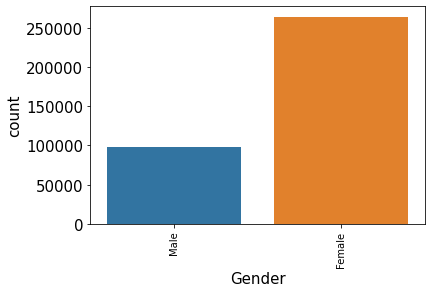

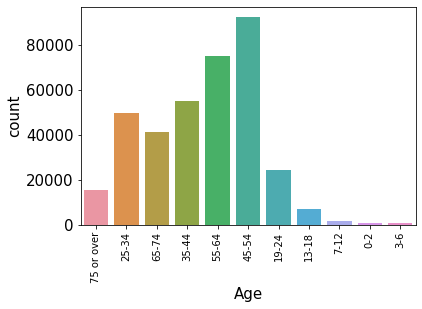

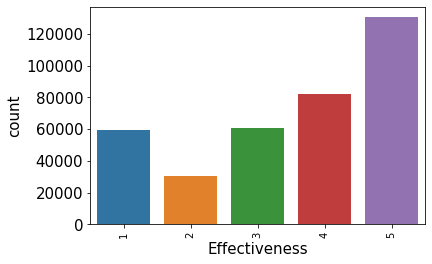

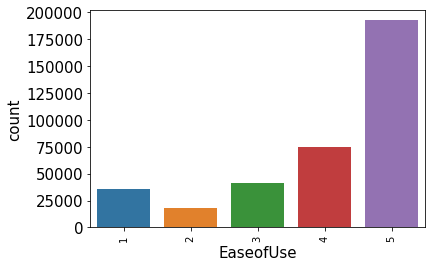

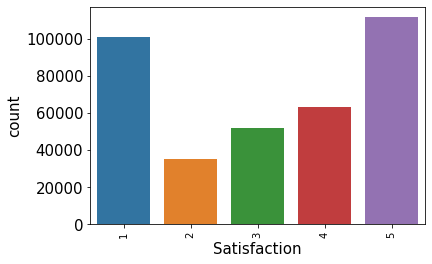

In [61]:
for i,cols in enumerate(['Gender','Age','Effectiveness','EaseofUse','Satisfaction']):
    plt.figure(i)
    sns.countplot(x=cols,data=df)
    plt.xlabel(cols,fontsize=15 )
    plt.ylabel('count',fontsize=15)
    plt.xticks(rotation=90,fontsize=10)
    plt.yticks(fontsize=15)
plt.show()

In [62]:
df_high=d.loc[(d['Side_effect_level']=='High')]

In [63]:
df_high

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Gender,Sides_countencoded,Side_effect_level
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,"Nausea , vomiting , constipation , lighthea...",0,Female,33014,High
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,"Nausea , vomiting , constipation , lighthea...",0,Female,33014,High
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,"Nausea , vomiting , constipation , lighthea...",1,Male,33014,High
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,"Nausea , vomiting , constipation , lighthea...",0,Male,33014,High
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361701,19-24,Birth Control,11/20/2013,chateal,163265,4,4,I haven't had many problems with this drug and...,3,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High
361703,25-34,Birth Control,10/7/2013,chateal,163265,3,4,As per the previous review my hair has been sh...,1,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High
361704,25-34,Birth Control,9/16/2013,chateal,163265,1,1,My hair started falling off. Even after stoppi...,1,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High
361705,19-24,Birth Control,9/9/2013,chateal,163265,1,3,I personally had terrible side effects using t...,2,Female,"Nausea , vomiting , headache , bloating , ...",3,Female,12116,High


In [64]:
df_high.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse              int64
Effectiveness          int64
Reviews               object
Satisfaction           int64
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

In [65]:
df_high['Effectiveness']=df_high['Effectiveness'].astype('object')

In [66]:
df_high['EaseofUse' ]=df_high['EaseofUse' ].astype('object')

In [67]:
df_high['Satisfaction']=df_high['Satisfaction'].astype('object')

In [68]:
df_high.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse             object
Effectiveness         object
Reviews               object
Satisfaction          object
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

Count plot when side effects are high

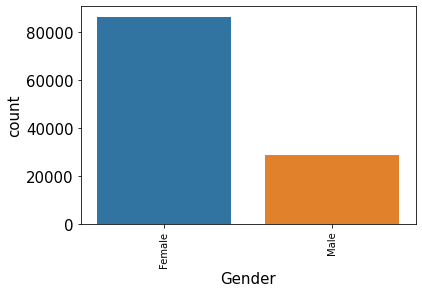

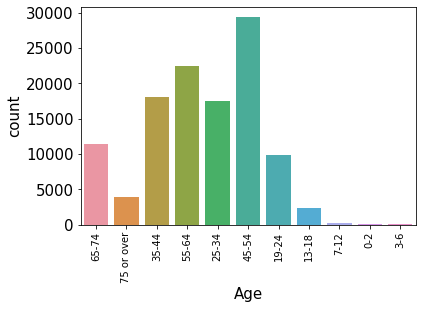

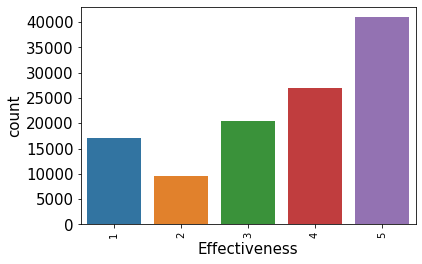

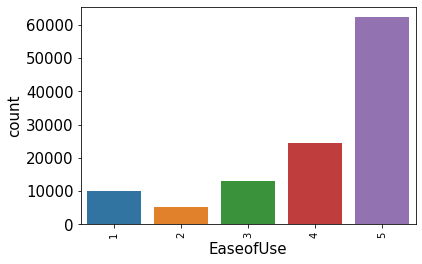

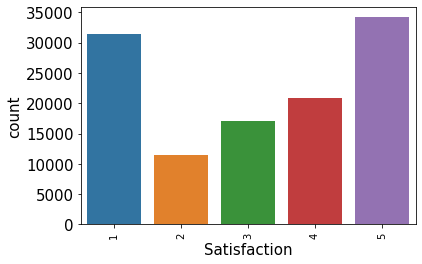

In [69]:
for i,cols in enumerate(['Gender','Age','Effectiveness','EaseofUse','Satisfaction']):
    plt.figure(i)
    sns.countplot(x=cols,data=df_high)
    plt.xlabel(cols,fontsize=15 )
    plt.ylabel('count',fontsize=15)
    plt.xticks(rotation=90,fontsize=10)
    plt.yticks(fontsize=15)
plt.show()

When side effect is medium

In [70]:
df_medium=d.loc[(d['Side_effect_level']=='Medium')]

In [71]:
df_medium.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse              int64
Effectiveness          int64
Reviews               object
Satisfaction           int64
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

In [72]:
df_medium['Effectiveness']=df_medium['Effectiveness'].astype('object')

In [73]:
df_medium['EaseofUse']=df_medium['EaseofUse'].astype('object')

In [74]:
df_medium['Satisfaction']=df_medium['Satisfaction'].astype('object')

In [75]:
df_medium.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse             object
Effectiveness         object
Reviews               object
Satisfaction          object
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

Category plot medium side effects

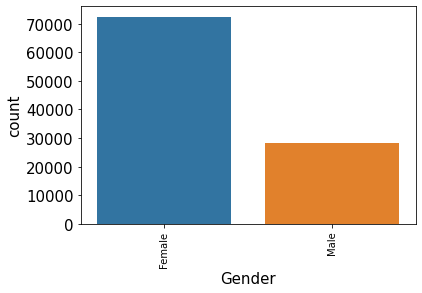

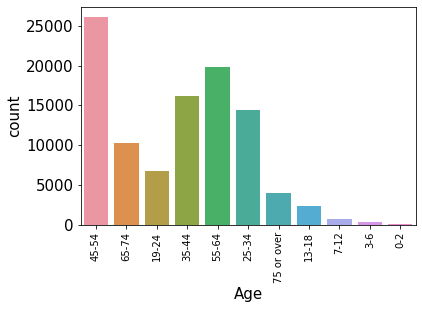

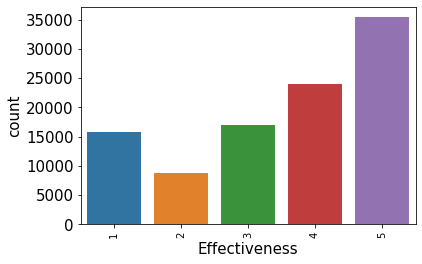

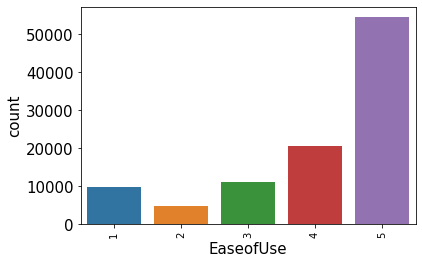

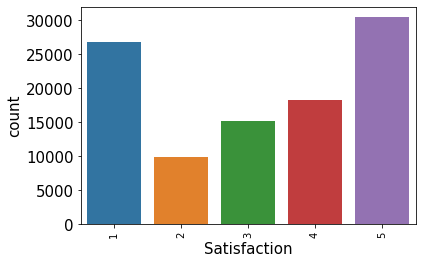

In [76]:
for i,cols in enumerate(['Gender','Age','Effectiveness','EaseofUse','Satisfaction']):
    plt.figure(i)
    sns.countplot(x=cols,data=df_medium)
    plt.xlabel(cols,fontsize=15 )
    plt.ylabel('count',fontsize=15)
    plt.xticks(rotation=90,fontsize=10)
    plt.yticks(fontsize=15)
plt.show()

Low side effect

In [77]:
d['Side_effect_level'].value_counts()

Low       146993
High      114949
Medium    100827
Name: Side_effect_level, dtype: int64

In [78]:
df_low=d.loc[(d['Side_effect_level']=='Low')]

In [79]:
df_low.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse              int64
Effectiveness          int64
Reviews               object
Satisfaction           int64
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

In [80]:
df_low['Effectiveness']=df_low['Effectiveness'].astype('object')

In [81]:
df_low['EaseofUse']=df_low['EaseofUse'].astype('object')

In [82]:
df_low['Satisfaction']=df_low['Satisfaction'].astype('object')

In [83]:
df_low.dtypes


Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse             object
Effectiveness         object
Reviews               object
Satisfaction          object
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

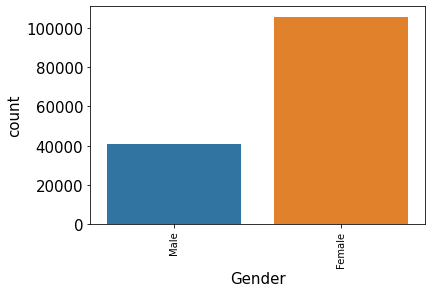

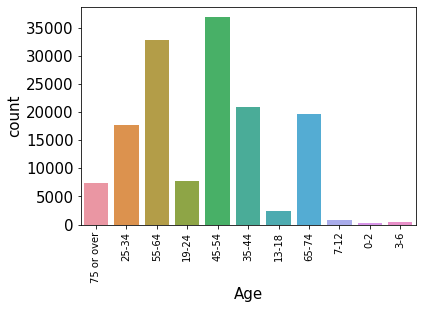

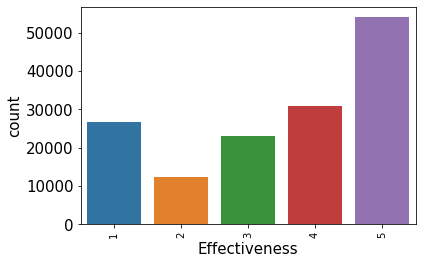

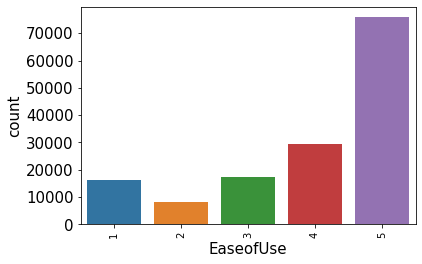

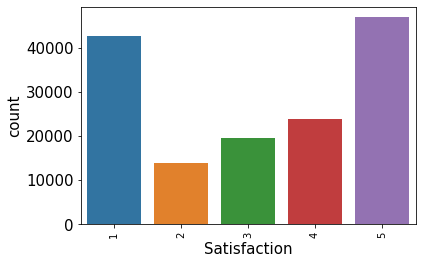

In [84]:
for i,cols in enumerate(['Gender','Age','Effectiveness','EaseofUse','Satisfaction']):
    plt.figure(i)
    sns.countplot(x=cols,data=df_low)
    plt.xlabel(cols,fontsize=15 )
    plt.ylabel('count',fontsize=15)
    plt.xticks(rotation=90,fontsize=10)
    plt.yticks(fontsize=15)
plt.show()

In [85]:
df.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse              int64
Effectiveness          int64
Reviews               object
Satisfaction           int64
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

In [86]:
df['Effectiveness']=df['Effectiveness'].astype('object')

In [87]:
df['EaseofUse']=df['EaseofUse'].astype('object')

In [88]:
df['Satisfaction']=df['Satisfaction'].astype('object')

In [89]:
df.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse             object
Effectiveness         object
Reviews               object
Satisfaction          object
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

In [90]:
cross_gender=pd.crosstab(index=df['Gender'],columns=df["Side_effect_level"])

In [91]:
cross_gender

Side_effect_level,High,Low,Medium
Gender,,,
Female,86225,106022,72489
Male,28724,40971,28338


In [92]:
cross_sat=pd.crosstab(index=df['Satisfaction'],columns=df["Side_effect_level"])

In [93]:
cross_sat

Side_effect_level,High,Low,Medium
Satisfaction,,,
1,31386,42659,26852
2,11413,13995,9929
3,17049,19582,15215
4,20918,23864,18367
5,34183,46893,30464


In [94]:
cross_ease_use=pd.crosstab(index=df['EaseofUse'],columns=df["Side_effect_level"])

In [95]:
cross_ease_use

Side_effect_level,High,Low,Medium
EaseofUse,,,
1,9935,16242,9749
2,5180,8060,4946
3,12941,17305,11052
4,24578,29577,20566
5,62315,75809,54514


In [96]:
cross_effectective=pd.crosstab(index=df['Effectiveness'],columns=df["Side_effect_level"])

In [97]:
cross_effectective

Side_effect_level,High,Low,Medium
Effectiveness,,,
1,17024,26636,15724
2,9614,12435,8746
3,20361,23019,17017
4,27006,30866,23943
5,40944,54037,35397


In [98]:
cross_age=pd.crosstab(index=df['Age'],columns=df["Side_effect_level"])

In [99]:
cross_age

Side_effect_level,High,Low,Medium
Age,,,
0-2,69,300,128
13-18,2304,2433,2308
19-24,9804,7694,6732
25-34,17475,17778,14452
3-6,113,447,278
35-44,18013,20871,16126
45-54,29339,36849,26043
55-64,22450,32847,19832
65-74,11342,19590,10283


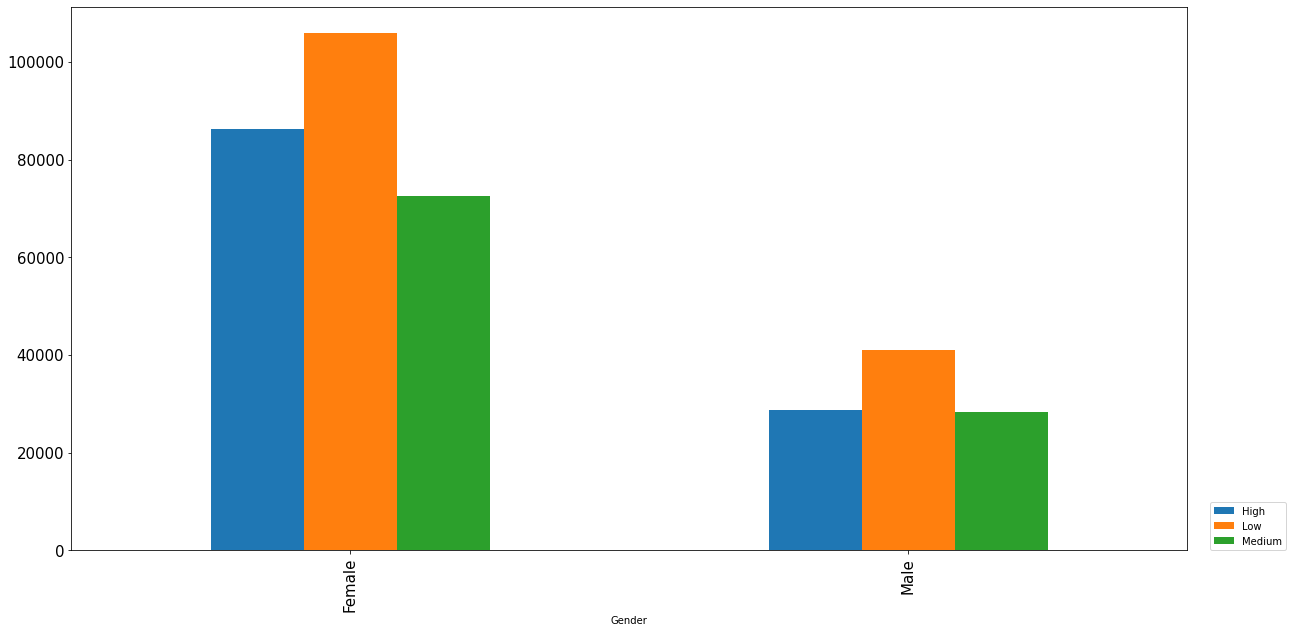

In [100]:
cross_gender.plot(kind="bar", figsize=(20,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.02,0))
plt.show()    

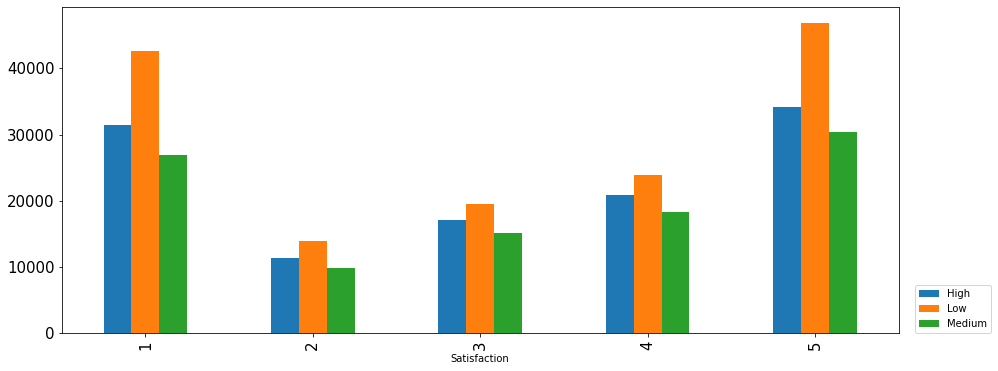

In [101]:
cross_sat.plot(kind="bar", figsize=(15,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.02,0))
plt.show()   

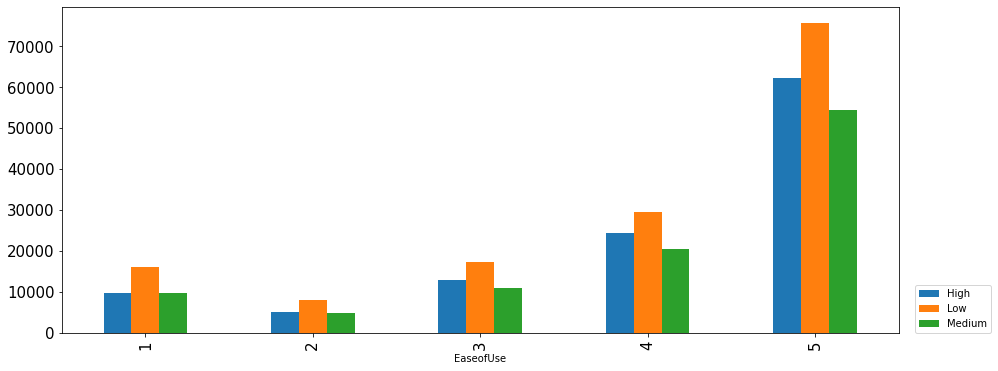

In [102]:
cross_ease_use.plot(kind="bar", figsize=(15,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.02,0))
plt.show()  

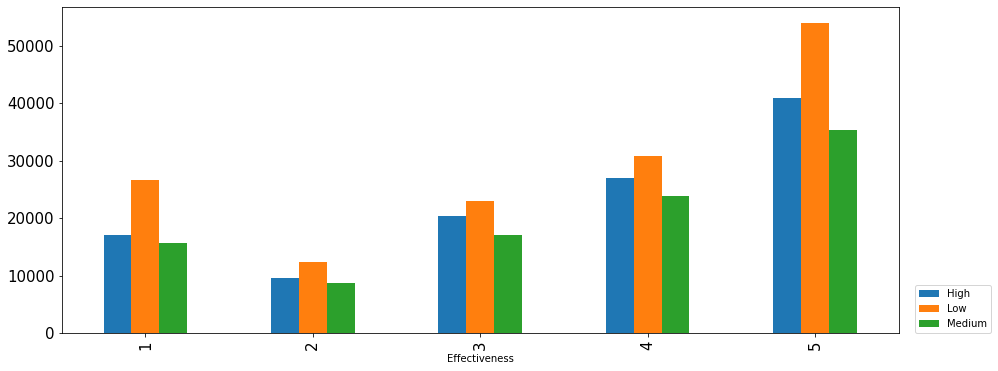

In [103]:
cross_effectective.plot(kind="bar", figsize=(15,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.02,0))
plt.show()   

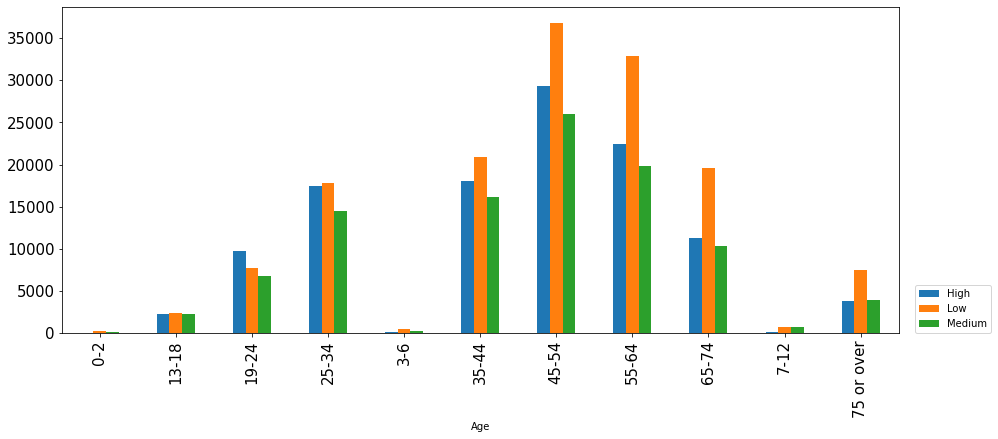

In [104]:
cross_age.plot(kind="bar", figsize=(15,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=(1.02,0))
plt.show()   

# Day 12

In [105]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level'],
      dtype='object')

In [106]:
df.corr()

,DrugId,UsefulCount,Sides_countencoded
DrugId,1.000000,0.010629,-0.008789
UsefulCount,0.010629,1.000000,-0.026494
Sides_countencoded,-0.008789,-0.026494,1.000000


In [107]:
d.corr()

,DrugId,UsefulCount,Sides_countencoded
DrugId,1.000000,0.010629,-0.008789
UsefulCount,0.010629,1.000000,-0.026494
Sides_countencoded,-0.008789,-0.026494,1.000000


In [108]:
d

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Gender,Sides_countencoded,Side_effect_level
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Male,150,Low
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Female,150,Low
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,"Nausea , vomiting , constipation , lighthea...",0,Female,33014,High
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,"Nausea , vomiting , constipation , lighthea...",0,Female,33014,High
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,"Nausea , vomiting , constipation , lighthea...",1,Male,33014,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Female,1214,Medium
362802,45-54,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Female,1214,Medium
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,Female,1214,Medium
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Male,1214,Medium


In [109]:
df.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse             object
Effectiveness         object
Reviews               object
Satisfaction          object
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

In [110]:
#df.groupby('Side_effect_level')[['Gender','Age','Effectiveness','EaseofUse','Satisfaction']].value_counts().T.plot(figsize=(12,8))
                                                                                                      
                                                                                                          
                                                                                                          

In [111]:
d.dtypes

Age                   object
Condition             object
Date                  object
Drug                  object
DrugId                 int64
EaseofUse             object
Effectiveness         object
Reviews               object
Satisfaction          object
Sex                   object
Sides                 object
UsefulCount            int64
Gender                object
Sides_countencoded     int64
Side_effect_level     object
dtype: object

In [112]:
d['Sideeffect_rank']=d['Sides_countencoded'].rank(ascending=True)

In [113]:
d['Sideeffect_rank']

0          43655.5
1          43655.5
2         346262.5
3         346262.5
4         346262.5
            ...   
362801    162132.5
362802    162132.5
362803    162132.5
362804    162132.5
362805    162132.5
Name: Sideeffect_rank, Length: 362769, dtype: float64

In [114]:
d['Sideffect_percentile']=d['Sides_countencoded'].rank(pct=True).round(2)*100

In [115]:
d['Sideffect_percentile']

0         12.0
1         12.0
2         95.0
3         95.0
4         95.0
          ... 
362801    45.0
362802    45.0
362803    45.0
362804    45.0
362805    45.0
Name: Sideffect_percentile, Length: 362769, dtype: float64

In [116]:
d[['Sides_countencoded','Side_effect_level','Sideffect_percentile','Sideeffect_rank']]

,Sides_countencoded,Side_effect_level,Sideffect_percentile,Sideeffect_rank
0,150,Low,12.0,43655.5
1,150,Low,12.0,43655.5
2,33014,High,95.0,346262.5
3,33014,High,95.0,346262.5
4,33014,High,95.0,346262.5
...,...,...,...,...
362801,1214,Medium,45.0,162132.5
362802,1214,Medium,45.0,162132.5
362803,1214,Medium,45.0,162132.5
362804,1214,Medium,45.0,162132.5


In [117]:
d.dtypes

Age                      object
Condition                object
Date                     object
Drug                     object
DrugId                    int64
EaseofUse                object
Effectiveness            object
Reviews                  object
Satisfaction             object
Sex                      object
Sides                    object
UsefulCount               int64
Gender                   object
Sides_countencoded        int64
Side_effect_level        object
Sideeffect_rank         float64
Sideffect_percentile    float64
dtype: object

In [118]:
d['Sideeffect_rank2']=d['Sides_countencoded'].rank(ascending=False,method='dense')

In [119]:
d[['Sides_countencoded','Side_effect_level','Sideffect_percentile','Sideeffect_rank','Sideeffect_rank2']]


,Sides_countencoded,Side_effect_level,Sideffect_percentile,Sideeffect_rank,Sideeffect_rank2
0,150,Low,12.0,43655.5,275.0
1,150,Low,12.0,43655.5,275.0
2,33014,High,95.0,346262.5,1.0
3,33014,High,95.0,346262.5,1.0
4,33014,High,95.0,346262.5,1.0
...,...,...,...,...,...
362801,1214,Medium,45.0,162132.5,56.0
362802,1214,Medium,45.0,162132.5,56.0
362803,1214,Medium,45.0,162132.5,56.0
362804,1214,Medium,45.0,162132.5,56.0


In [120]:
d.drop(['Sideeffect_rank','Sideeffect_rank2'],axis=1,inplace=True)

In [121]:
d.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile'],
      dtype='object')

In [122]:
d['Sideeffect_rank']=d['Sides_countencoded'].rank(ascending=False,method='dense')

In [123]:
d[['Drug','Sides_countencoded','Side_effect_level','Sideffect_percentile','Sideeffect_rank']]

,Drug,Sides_countencoded,Side_effect_level,Sideffect_percentile,Sideeffect_rank
0,25dph-7.5peh,150,Low,12.0,275.0
1,25dph-7.5peh,150,Low,12.0,275.0
2,warfarin (bulk) 100 % powder,33014,High,95.0,1.0
3,warfarin (bulk) 100 % powder,33014,High,95.0,1.0
4,warfarin (bulk) 100 % powder,33014,High,95.0,1.0
...,...,...,...,...,...
362801,chantix,1214,Medium,45.0,56.0
362802,chantix,1214,Medium,45.0,56.0
362803,chantix,1214,Medium,45.0,56.0
362804,chantix,1214,Medium,45.0,56.0


In [124]:
high=d.loc[(d['Side_effect_level']=="High")]

In [125]:
high

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Gender,Sides_countencoded,Side_effect_level,Sideffect_percentile,Sideeffect_rank
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,"Nausea , vomiting , constipation , lighthea...",0,Female,33014,High,95.0,1.0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,"Nausea , vomiting , constipation , lighthea...",0,Female,33014,High,95.0,1.0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,"Nausea , vomiting , constipation , lighthea...",1,Male,33014,High,95.0,1.0
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,"Nausea , vomiting , constipation , lighthea...",0,Male,33014,High,95.0,1.0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High,89.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361701,19-24,Birth Control,11/20/2013,chateal,163265,4,4,I haven't had many problems with this drug and...,3,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High,89.0,2.0
361703,25-34,Birth Control,10/7/2013,chateal,163265,3,4,As per the previous review my hair has been sh...,1,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High,89.0,2.0
361704,25-34,Birth Control,9/16/2013,chateal,163265,1,1,My hair started falling off. Even after stoppi...,1,Female,"Nausea , vomiting , headache , bloating , ...",0,Female,12116,High,89.0,2.0
361705,19-24,Birth Control,9/9/2013,chateal,163265,1,3,I personally had terrible side effects using t...,2,Female,"Nausea , vomiting , headache , bloating , ...",3,Female,12116,High,89.0,2.0


In [126]:
high.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [127]:
high['Sideffect_percentile'].unique()

array([95., 89., 70., 86., 73., 72., 74., 84., 82., 69., 81., 77., 78.,
       75., 79., 71.])

In [128]:
a_high=high.sort_values(by='Sideeffect_rank',ascending=True)

In [129]:
a_high.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [130]:
a_high['Condition'].unique()

array(['Other', 'Pain',
       'Combined High Blood Cholesterol and Triglyceride Level',
       'Neuropathic Pain', 'High Cholesterol',
       'High Amount of Fats in the Blood',
       'Homozygous Inherited High Blood Cholesterol',
       'High Amount of Triglyceride in the Blood',
       'Prevention of Transient Ischemic Attacks',
       'Increased Triglycerides and Cholesterol',
       'Slow Progression of Disease of the Arteries of the Heart',
       'Stroke Prevention', 'Treatment to Prevent a Heart Attack',
       'Changes Involving Fatty Deposits in the Blood Vessels',
       'Allergic Asthma', 'Non-Seasonal Allergic Runny Nose',
       'Asthma Prevention', 'Exercise-Induced Bronchospasm Prevention',
       'Seasonal Runny Nose',
       'Heterozygous Inherited High Blood Cholesterol',
       'General Anesthesia', 'Primary Prevention of Heart Attack',
       'Inflammation of the Nose due to an Allergy', 'Late Onset Asthma',
       'Low HDL Cholesterol', 'Minor Skin Infection caus

In [131]:
a_high.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [132]:
a_high['Drug'].nunique()

1911

In [133]:
top_high=a_high.drop_duplicates(subset='Sideeffect_rank',keep ='first')
    

In [134]:
type(top_high)

pandas.core.frame.DataFrame

In [135]:
top_high.shape

(16, 17)

In [136]:
top_10=top_high[:10]

In [137]:
top_10['Drug']

2         warfarin (bulk) 100 % powder
219146                           aubra
13735              lisinopril solution
268643             gabapentin solution
95476                    metformin hcl
116932          prednisone concentrate
317671                        cymbalta
194512                         topamax
184594                    tramadol hcl
263025                      effexor xr
Name: Drug, dtype: object

In [138]:
top_10.shape

(10, 17)

In [139]:
top_10.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [140]:
top_10['Drug'].nunique()

10

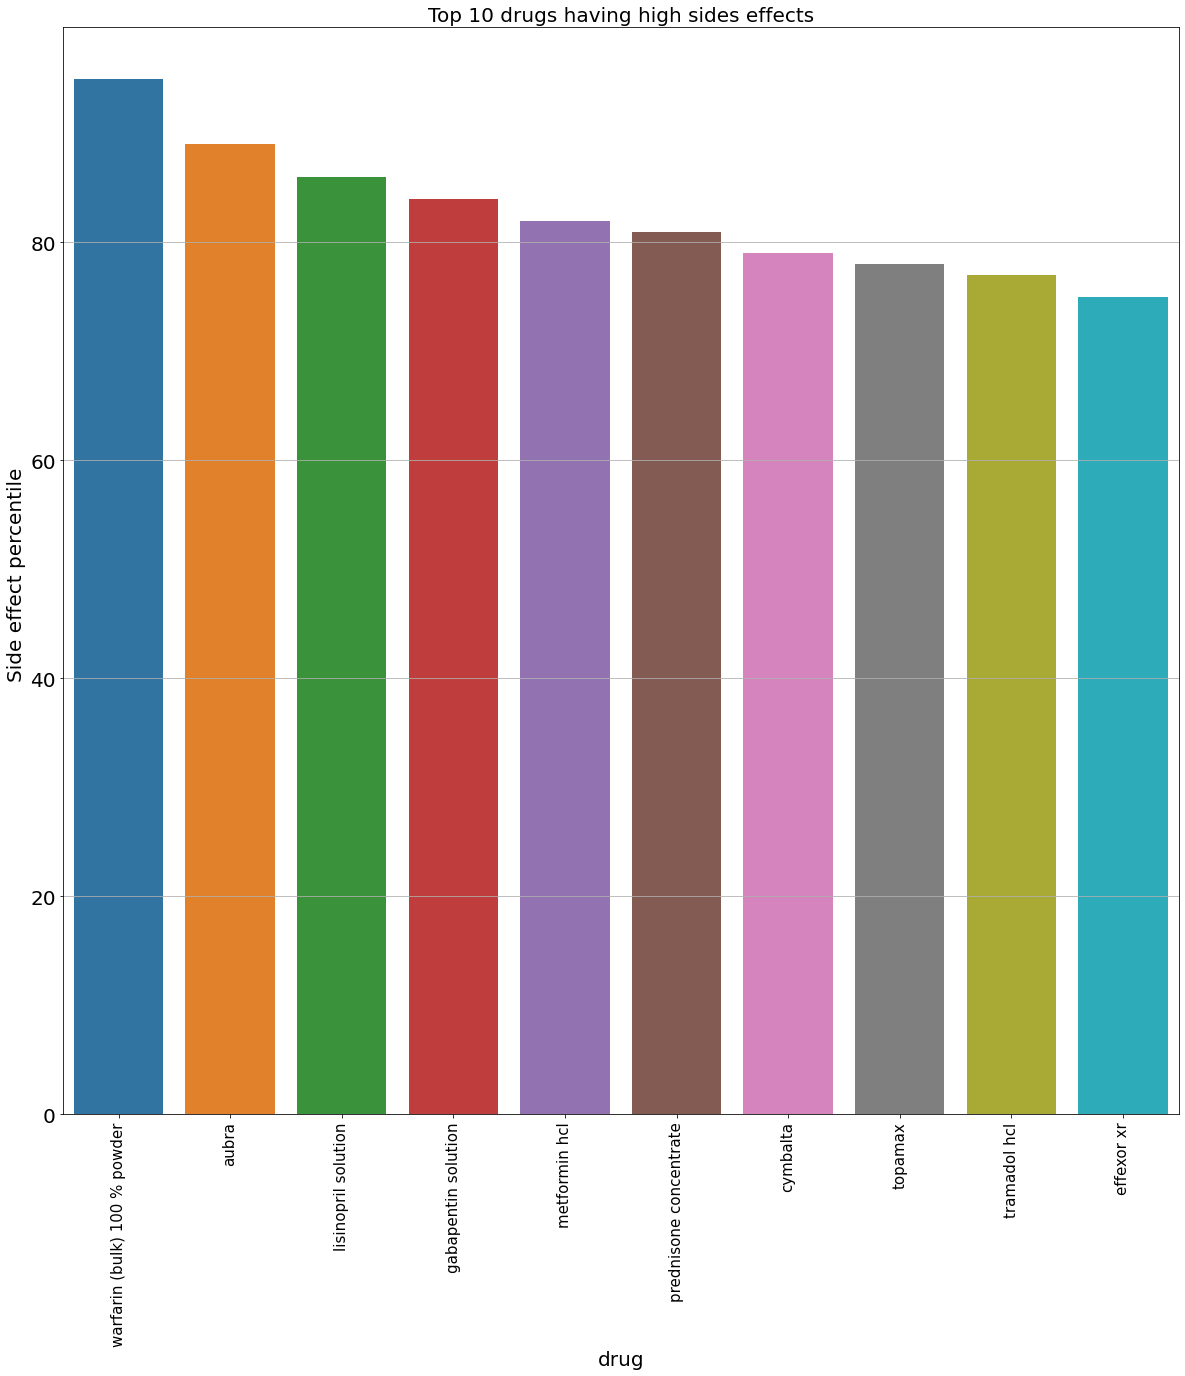

In [141]:
plt.figure(figsize=(20,20))
plt.title('Top 10 drugs having high sides effects',fontsize=20)
sns.barplot(x='Drug',y='Sideffect_percentile',data=top_10)
plt.grid(axis='y')
plt.xlabel("drug",fontsize=20 )
plt.ylabel("Side effect percentile ",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

In [142]:
high_bottom10=high.sort_values(by='Sideeffect_rank',ascending=False)


In [143]:
bh1=high_bottom10.drop_duplicates(subset='Sideeffect_rank',keep ='first')

In [144]:
bh1.shape

(16, 17)

In [145]:
bh1['Drug'].nunique()

16

In [146]:
bh1.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [147]:
bh1[['Sideeffect_rank','Drug']]

,Sideeffect_rank,Drug
89316,16.0,"methadose tablet, soluble"
250164,15.0,adipex-p
337946,14.0,citalopram hbr
30636,13.0,levothyroxine sodium
28256,12.0,lamictal tablet
34328,11.0,lexapro
261515,10.0,effexor xr
184258,9.0,tramadol hcl
196174,8.0,topamax
307663,7.0,duloxetine hcl


In [148]:
bottom_high=bh1[:10]

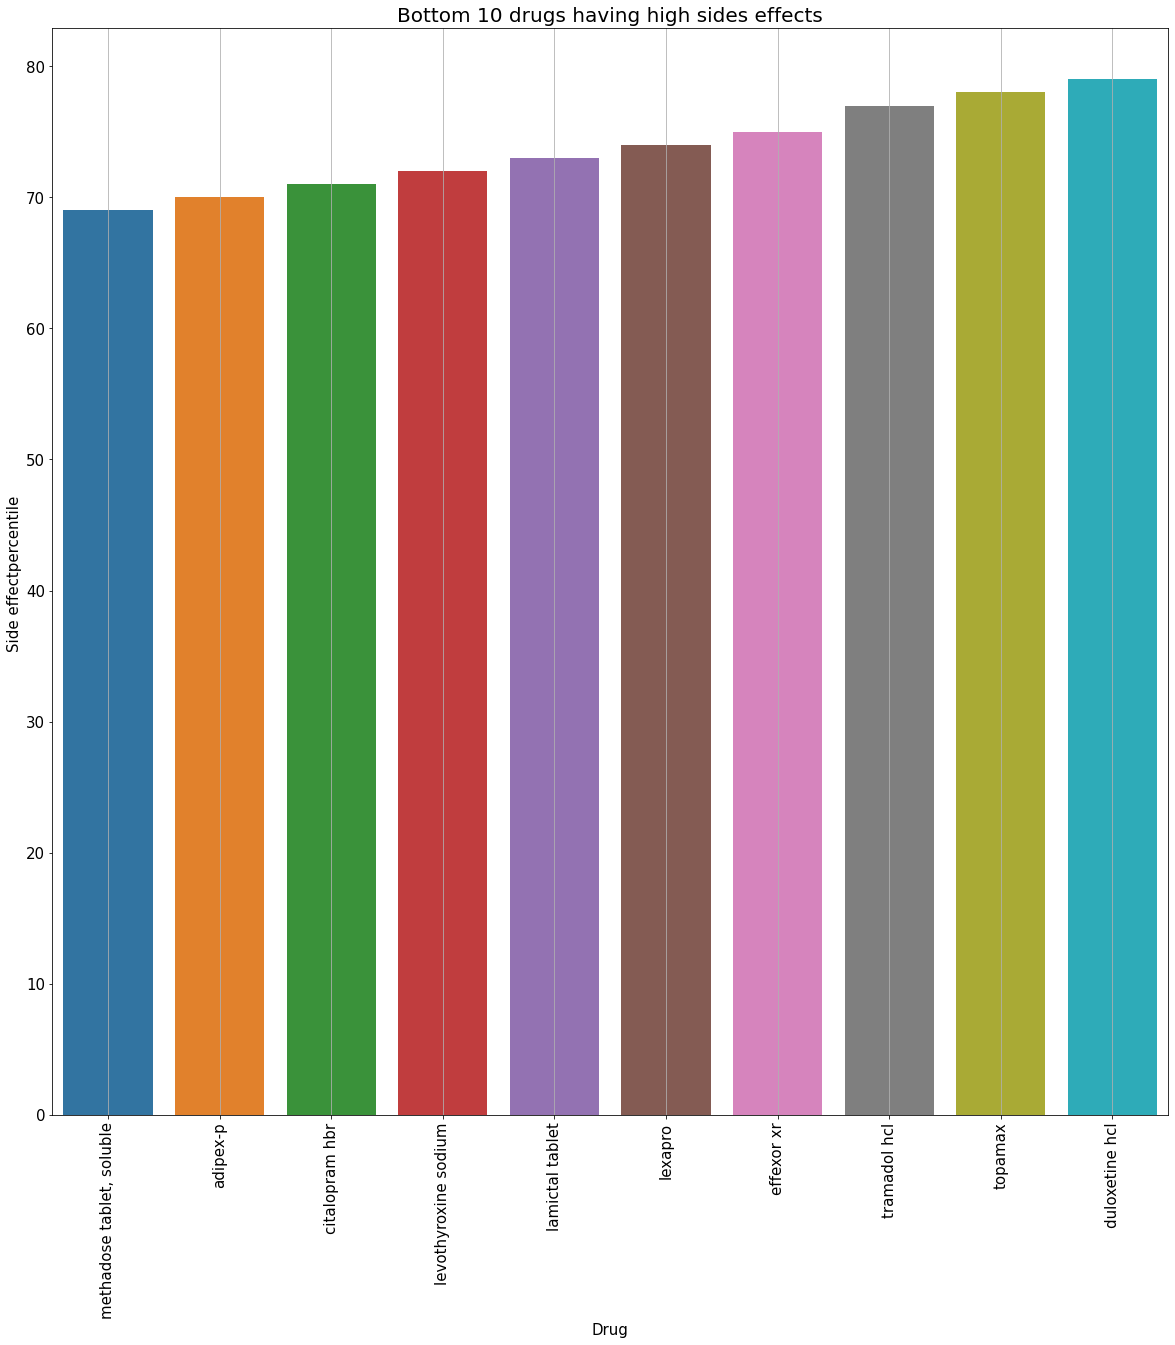

In [149]:
plt.figure(figsize=(20,20))
plt.title('Bottom 10 drugs having high sides effects',fontsize=20)
sns.barplot(x='Drug',y='Sideffect_percentile',data=bottom_high)
plt.grid(axis='x')
plt.xlabel("Drug",fontsize=15 )
plt.ylabel("Side effectpercentile ",fontsize=15)
plt.xticks(rotation=90,fontsize=15,)
plt.yticks(fontsize=15)
plt.show()

Medium

In [150]:
medium=d.loc[(d['Side_effect_level']=="Medium")]

In [151]:
medium

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Gender,Sides_countencoded,Side_effect_level,Sideffect_percentile,Sideeffect_rank
184,45-54,Neuropathic Pain,2/29/2020,lyrica,93965,5,5,No Script or health Insurance needed to place ...,5,,"Drowsiness, dizziness , dry mouth , constip...",12,Female,3175,Medium,65.0,20.0
185,45-54,Nerve Pain after Herpes,2/24/2020,lyrica,93965,5,5,After using Lyrica for 3 weeks it really ly wo...,5,Male,"Drowsiness, dizziness , dry mouth , constip...",0,Male,3175,Medium,65.0,20.0
186,65-74,Neuropathic Pain,2/20/2020,lyrica,93965,5,5,During an excruciating bout of sciatica my doc...,5,Female,"Drowsiness, dizziness , dry mouth , constip...",0,Female,3175,Medium,65.0,20.0
187,19-24,Neuropathic Pain,12/8/2019,lyrica,93965,1,3,After being on Lyrica (pregabalin) for over tw...,1,Female,"Drowsiness, dizziness , dry mouth , constip...",14,Female,3175,Medium,65.0,20.0
188,35-44,Neuropathic Pain,12/1/2019,lyrica,93965,5,5,I started taking Lyrica about six weeks ago. I...,5,,"Drowsiness, dizziness , dry mouth , constip...",11,Female,3175,Medium,65.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Female,1214,Medium,45.0,56.0
362802,45-54,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Female,1214,Medium,45.0,56.0
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,Female,1214,Medium,45.0,56.0
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Male,1214,Medium,45.0,56.0


In [152]:
medium.shape

(100827, 17)

In [153]:
a2=medium.sort_values(by='Sideeffect_rank',ascending=True)

In [154]:
a2.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [155]:
a2[['Sideeffect_rank','Sideffect_percentile','Drug']]

,Sideeffect_rank,Sideffect_percentile,Drug
56840,17.0,68.0,oxycodone hcl er
57241,17.0,68.0,oxycodone hcl er
57239,17.0,68.0,oxycodone hcl er
57237,17.0,68.0,oxycodone hcl er
57235,17.0,68.0,oxycodone hcl er
...,...,...,...
284810,69.0,41.0,hydroxyzine hcl
284814,69.0,41.0,hydroxyzine hcl
284816,69.0,41.0,hydroxyzine hcl
284720,69.0,41.0,hydroxyzine hcl


In [156]:
mh1=a2.drop_duplicates(subset='Sideeffect_rank',keep ='first')

In [157]:
mh1.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Gender,Sides_countencoded,Side_effect_level,Sideffect_percentile,Sideeffect_rank
56840,45-54,Pain,11/12/2010,oxycodone hcl er,1025,4,4,,4,,"Nausea , vomiting , constipation , dry mout...",0,Female,3449,Medium,68.0,17.0
235852,45-54,Chronic Trouble Sleeping,3/30/2011,ambien,9690,5,5,I've had a terrible sleep disorder for the pas...,5,Female,Dizziness may occur.,21,Female,3236,Medium,67.0,18.0
344319,45-54,Panic Disorder,2/16/2008,"clonazepam tablet,disintegrating",14403,4,4,I had been experiencing panic attack and anxie...,4,Male,"Drowsiness, dizziness , tiredness, loss of co...",7,Male,3196,Medium,66.0,19.0
113838,45-54,"Disorder characterized by Stiff, Tender & Pain...",1/25/2014,"pregabalin 200 mg capsule anticonvulsants, gab...",93954,5,5,it has really helped with pain relief,3,Female,"Drowsiness, dizziness , dry mouth , constip...",0,Female,3175,Medium,65.0,20.0
160958,45-54,Depression,3/18/2012,sertraline hcl,1,2,3,"I suffer from severe chronic depression,and ha...",3,Female,"Nausea , dizziness , drowsiness, dry mouth ,...",12,Female,3156,Medium,64.0,21.0


In [158]:
medium_tp10=mh1[:10]

In [159]:
medium_tp10['Drug'].nunique()

10

In [160]:
medium_tp10.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

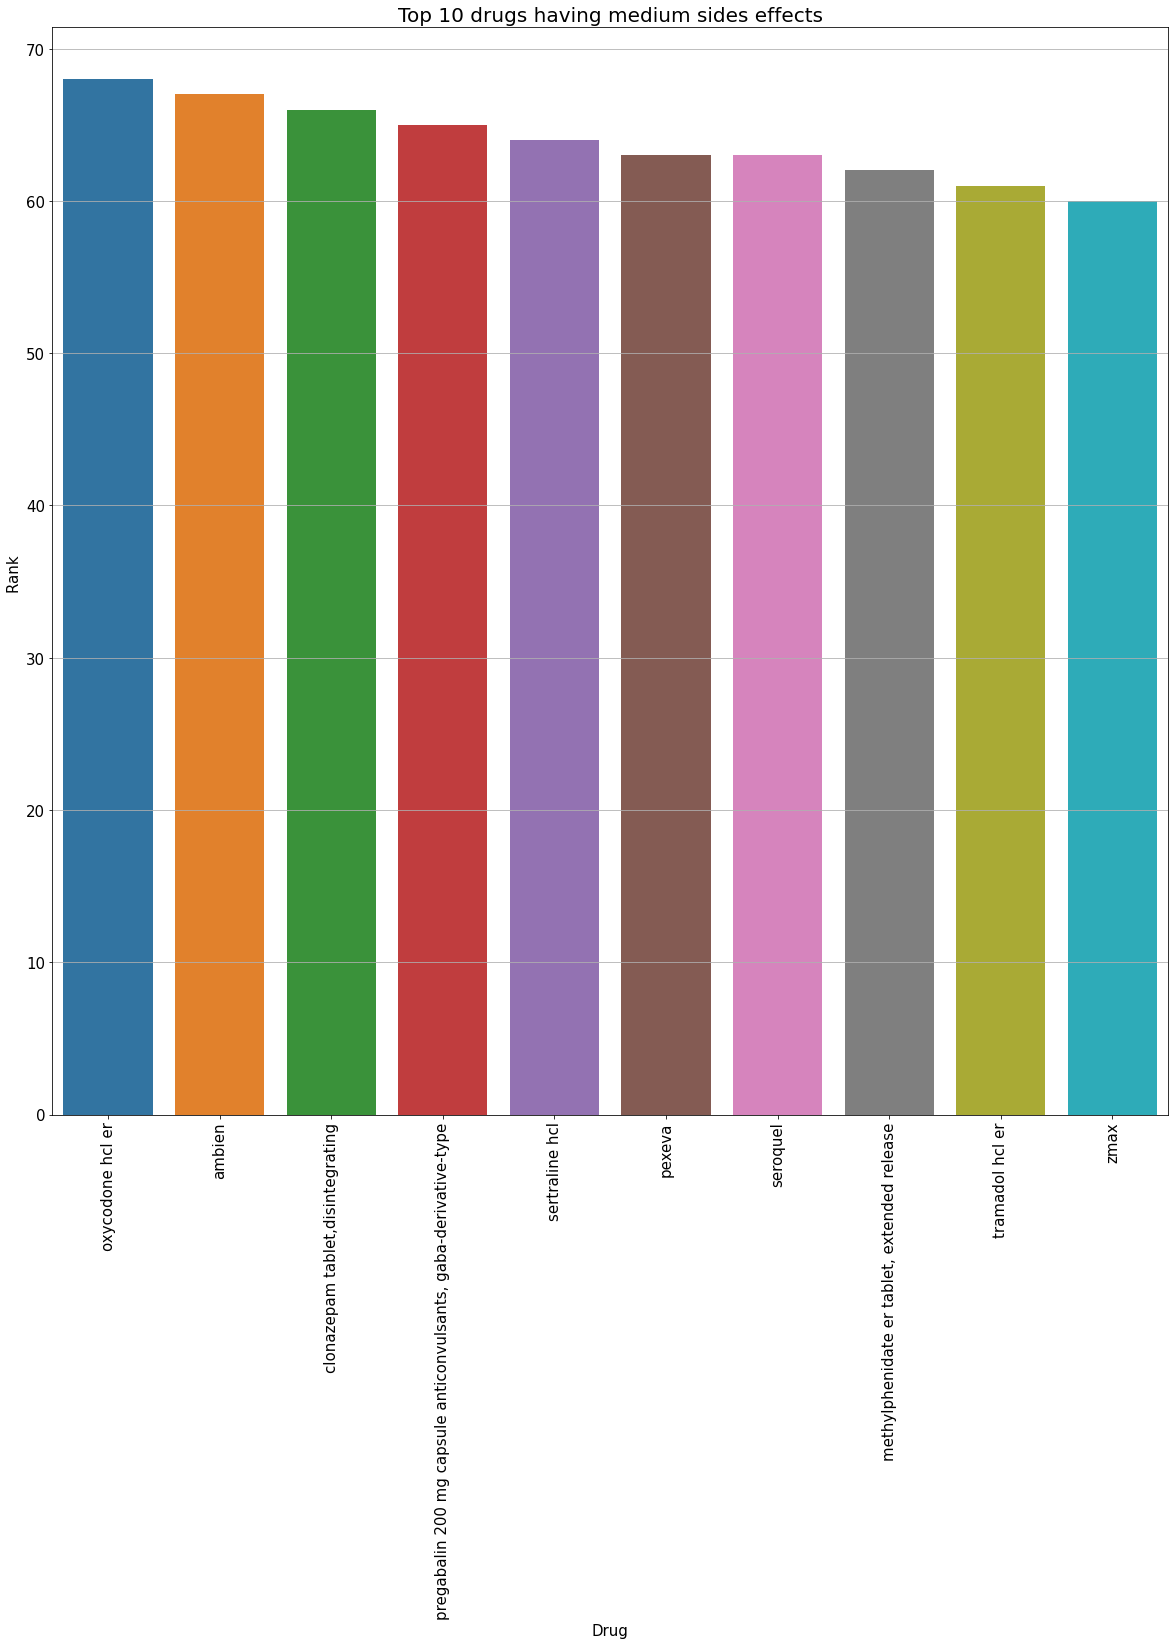

In [161]:
plt.figure(figsize=(20,20))
plt.title('Top 10 drugs having medium sides effects',fontsize=20)
sns.barplot(x='Drug',y='Sideffect_percentile',data=medium_tp10)
plt.grid(axis='y')
plt.xlabel("Drug",fontsize=15 )
plt.ylabel("Rank ",fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [162]:
b2=medium.sort_values(by='Sideeffect_rank',ascending=False)

In [163]:
b2[['Sideeffect_rank','Drug']]

,Sideeffect_rank,Drug
214787,69.0,vistaril
214253,69.0,vistaril
214226,69.0,vistaril
214228,69.0,vistaril
214230,69.0,vistaril
...,...,...
49265,17.0,oxycontin
49270,17.0,oxycontin
49275,17.0,oxycontin
49280,17.0,oxycontin


In [164]:
%whos

Variable             Type                Data/Info
--------------------------------------------------
a                    DataFrame                          Age      C<...>362806 rows x 12 columns]
a2                   DataFrame                     Age            <...>100827 rows x 17 columns]
a_high               DataFrame                     Age            <...>114949 rows x 17 columns]
b2                   DataFrame                     Age            <...>100827 rows x 17 columns]
bh1                  DataFrame                          Age       <...>  95.0              1.0  
bottom_high          DataFrame                     Age            <...>  79.0              7.0  
cols                 str                 Satisfaction
cross_age            DataFrame           Side_effect_level   High <...>      3866   7438    3921
cross_ease_use       DataFrame           Side_effect_level   High <...>     62315  75809   54514
cross_effectective   DataFrame           Side_effect_level   High <.

Removing duplicates

In [165]:
b3=b2.drop_duplicates(subset='Sideeffect_rank',keep ='first')

In [166]:
b3.shape

(53, 17)

In [167]:
b3['Drug'].nunique()

53

In [168]:
med_bottom=b3[:10]

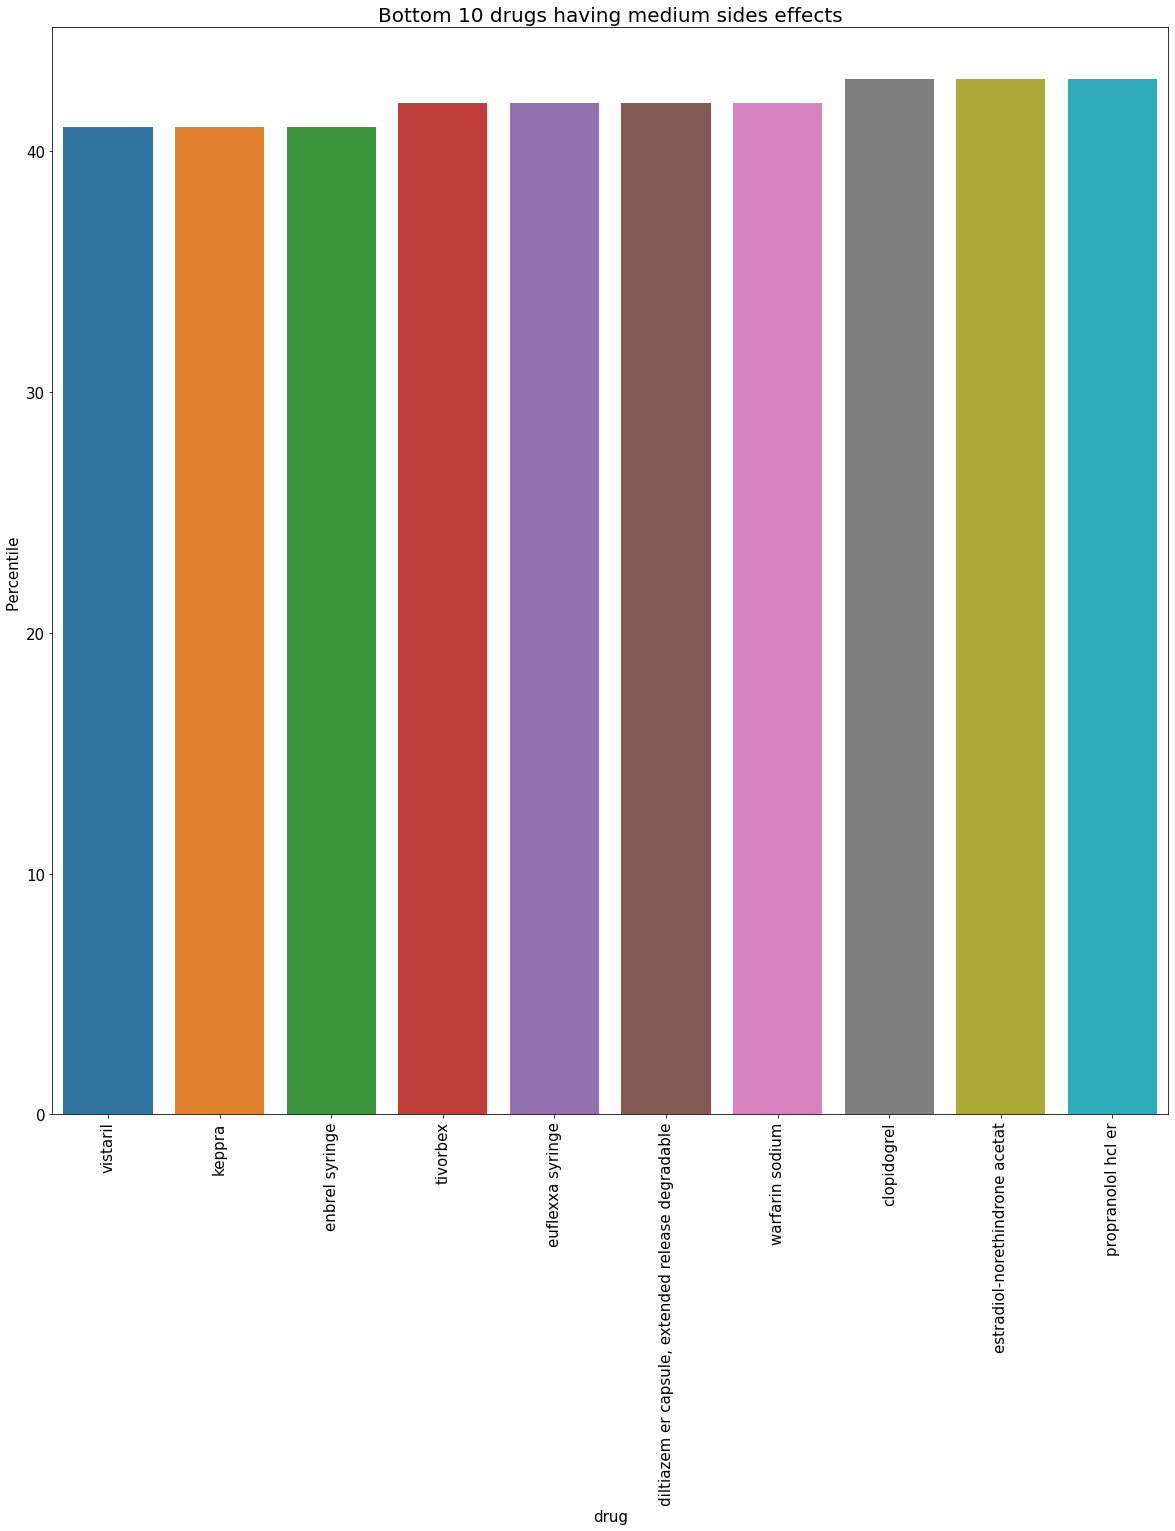

In [169]:
plt.figure(figsize=(20,20))
plt.title('Bottom 10 drugs having medium sides effects',fontsize=20)
sns.barplot(x='Drug',y='Sideffect_percentile',data=med_bottom)
#plt.grid(axis='x')
plt.xlabel("drug",fontsize=15 )
plt.ylabel("Percentile ",fontsize=15)
plt.xticks(rotation=90,fontsize=15,)
plt.yticks(fontsize=15)
plt.show()

Low

In [170]:
d['Side_effect_level'].value_counts()

Low       146993
High      114949
Medium    100827
Name: Side_effect_level, dtype: int64

In [171]:
low=d.loc[(d['Side_effect_level']=="Low")]

In [172]:
low[['Sideeffect_rank','Drug']]

,Sideeffect_rank,Drug
0,275.0,25dph-7.5peh
1,275.0,25dph-7.5peh
9,267.0,"12 hour nasal relief spray, non-aerosol"
11,81.0,lyza
12,81.0,lyza
...,...,...
361546,411.0,chemet
361547,411.0,chemet
361548,411.0,chemet
361597,132.0,chest congestion relief dm


In [173]:
a4=low.sort_values(by='Sideeffect_rank',ascending=True)

In [174]:
a4.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [175]:
a4[['Sideeffect_rank','Drug']]

,Sideeffect_rank,Drug
178940,70.0,"trileptal suspension, (final dose form)"
177594,70.0,trileptal
177593,70.0,"trileptal suspension, (final dose form)"
177564,70.0,trileptal
177563,70.0,"trileptal suspension, (final dose form)"
...,...,...
127319,417.0,peganone
97349,417.0,melphalan 50 mg intravenous solution alkylatin...
279517,417.0,farydak
213998,417.0,verzenio


In [176]:
b6=a4.drop_duplicates(subset='Sideeffect_rank',keep ='first')

In [177]:
b6[['Sideeffect_rank','Drug']]

,Sideeffect_rank,Drug
178940,70.0,"trileptal suspension, (final dose form)"
328675,71.0,diovan
205111,72.0,xyzal
114088,73.0,maxalt
200614,74.0,tamiflu
...,...,...
150850,413.0,"synarel spray, non-aerosol"
298558,414.0,jevtana vial
180855,415.0,tretinoin
140010,416.0,"radicava solution, intravenous piggyback"


In [178]:
low_top=b6[:10]

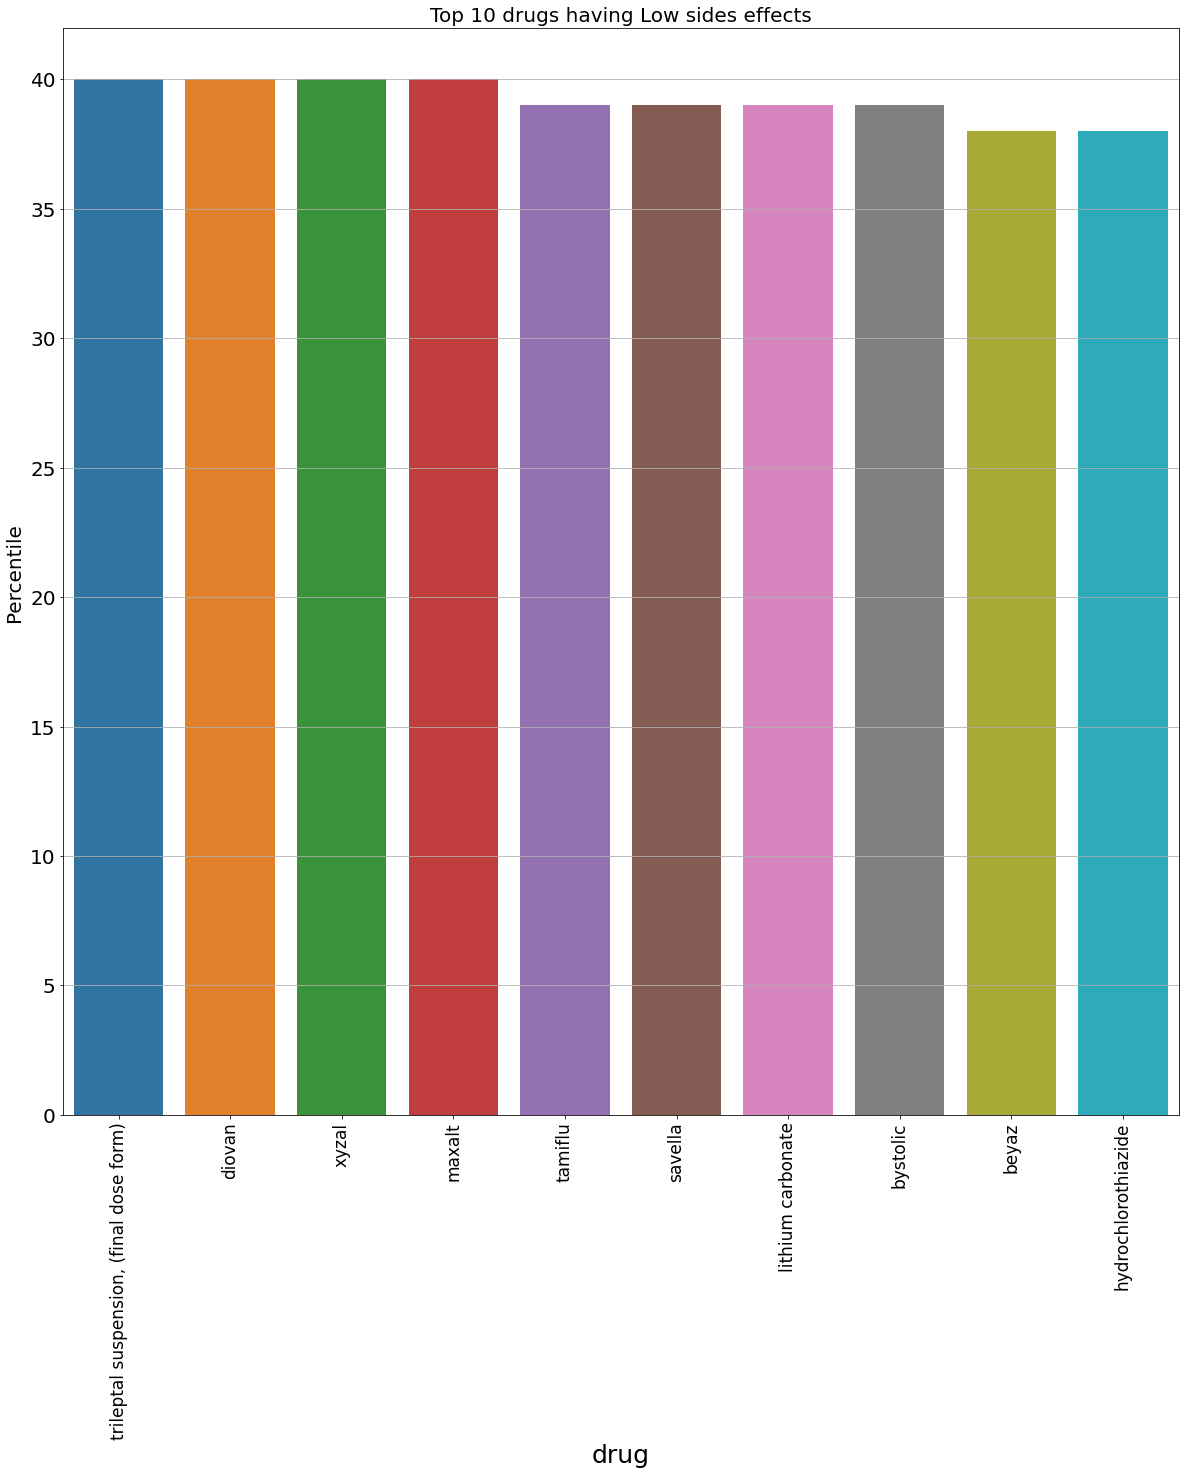

In [179]:
plt.figure(figsize=(20,20))
plt.title('Top 10 drugs having Low sides effects',fontsize=20)
sns.barplot(x='Drug',y='Sideffect_percentile',data=low_top)
plt.grid(axis='y')
plt.xlabel("drug",fontsize=25 )
plt.ylabel("Percentile ",fontsize=20)
plt.xticks(rotation=90,fontsize=17)
plt.yticks(fontsize=20)
plt.show()

In [180]:
a5=low.sort_values(by='Sideeffect_rank',ascending=False)

In [181]:
a5[['Sideeffect_rank','Drug']]

,Sideeffect_rank,Drug
235611,417.0,aptivus
176326,417.0,triprolidine hcl
308536,417.0,blincyto kit
255078,417.0,eprosartan mesylate
159331,417.0,signifor ampul
...,...,...
61102,70.0,oxcarbazepine
61103,70.0,oxcarbazepine
61111,70.0,oxcarbazepine
61112,70.0,oxcarbazepine


In [182]:
b7=a5.drop_duplicates(subset='Sideeffect_rank',keep ='first')

In [183]:
b7[['Sideeffect_rank','Drug']]

,Sideeffect_rank,Drug
235611,417.0,aptivus
274385,416.0,flurbiprofen sodium drops
257476,415.0,emverm
226800,414.0,amphetamine sulfate 20 mg disintegrating tablet
297450,413.0,idelalisib tablet
...,...,...
200747,74.0,tamiflu
294263,73.0,imitrex
361521,72.0,children's cetirizine hcl
330503,71.0,diovan


In [184]:
low_bottom=b7[:10]

In [185]:
low_bottom.shape

(10, 17)

In [186]:
low_bottom['Drug'].nunique()

10

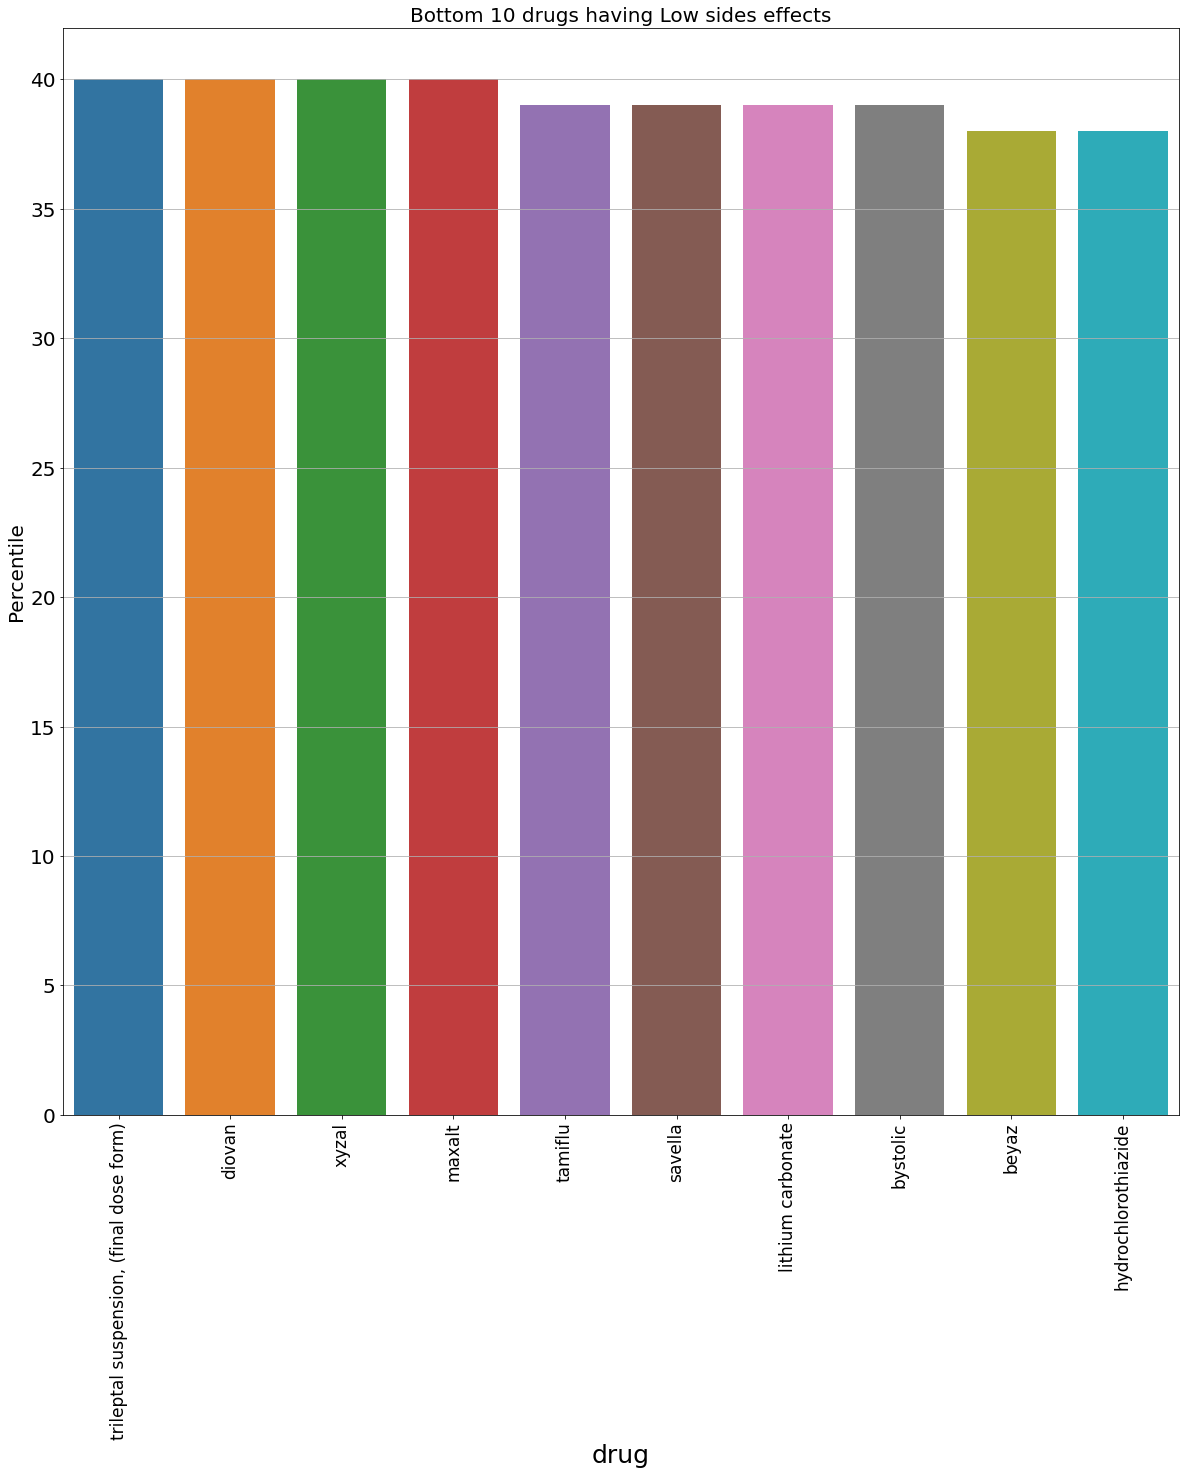

In [187]:
plt.figure(figsize=(20,20))
plt.title('Bottom 10 drugs having Low sides effects',fontsize=20)
sns.barplot(x='Drug',y='Sideffect_percentile',data=low_top)
plt.grid(axis='y')
plt.xlabel("drug",fontsize=25 )
plt.ylabel("Percentile",fontsize=20)
plt.xticks(rotation=90,fontsize=17)
plt.yticks(fontsize=20)
plt.show()

# DAY 13

In [188]:
d.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [189]:
d['Sides'].value_counts()

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                   33014
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                          9158
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                       7790
Nausea ,  vomiting ,  stomach  upset,  diarrhea ,  weakness , or a  metallic taste  in the  mouth  may occur.                                                                    5372
                                                                                          

In [190]:
d.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Gender', 'Sides_countencoded', 'Side_effect_level',
       'Sideffect_percentile', 'Sideeffect_rank'],
      dtype='object')

In [192]:
model=d[['Age','Drug','EaseofUse','Satisfaction','Effectiveness',
        'Gender', 'Sides_countencoded', 'Side_effect_level',
         'Sideffect_percentile', 'Sideeffect_rank']]

In [193]:
model.head(10)

,Age,Drug,EaseofUse,Satisfaction,Effectiveness,Gender,Sides_countencoded,Side_effect_level,Sideffect_percentile,Sideeffect_rank
0,75 or over,25dph-7.5peh,5,5,5,Male,150,Low,12.0,275.0
1,25-34,25dph-7.5peh,5,5,5,Female,150,Low,12.0,275.0
2,65-74,warfarin (bulk) 100 % powder,2,3,3,Female,33014,High,95.0,1.0
3,75 or over,warfarin (bulk) 100 % powder,2,1,2,Female,33014,High,95.0,1.0
4,35-44,warfarin (bulk) 100 % powder,1,1,1,Male,33014,High,95.0,1.0
5,55-64,warfarin (bulk) 100 % powder,4,4,4,Male,33014,High,95.0,1.0
6,25-34,wymzya fe,5,2,5,Female,12116,High,89.0,2.0
7,45-54,wymzya fe,5,5,5,Female,12116,High,89.0,2.0
8,25-34,wymzya fe,4,2,2,Female,12116,High,89.0,2.0
9,55-64,"12 hour nasal relief spray, non-aerosol",4,2,2,Male,159,Low,13.0,267.0


Encoding

In [194]:
model.dtypes

Age                      object
Drug                     object
EaseofUse                object
Satisfaction             object
Effectiveness            object
Gender                   object
Sides_countencoded        int64
Side_effect_level        object
Sideffect_percentile    float64
Sideeffect_rank         float64
dtype: object

Ordinal Encoding

In [195]:
model.Age.value_counts()

45-54         92231
55-64         75129
35-44         55010
25-34         49705
65-74         41215
19-24         24230
75 or over    15225
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [196]:
age=['75 or over','65-74','55-64','45-54','35-44','25-34','19-24','13-18','7-12','3-6','0-2']

In [197]:
from sklearn.preprocessing import OrdinalEncoder

In [198]:
o_age=OrdinalEncoder(categories=[age])

In [199]:
model["Age"]=o_age.fit_transform(model[['Age']])

In [200]:
model["Age"]

0         0.0
1         5.0
2         1.0
3         0.0
4         4.0
         ... 
362801    2.0
362802    3.0
362803    5.0
362804    2.0
362805    3.0
Name: Age, Length: 362769, dtype: float64

In [201]:
d["Age"]

0         75 or over
1              25-34
2              65-74
3         75 or over
4              35-44
             ...    
362801         55-64
362802         45-54
362803         25-34
362804         55-64
362805         45-54
Name: Age, Length: 362769, dtype: object

In [202]:
model['EaseofUse']=model['EaseofUse'].astype('int')

In [203]:
model['Satisfaction']=model['Satisfaction'].astype('int')

In [204]:
model['Effectiveness']=model['Effectiveness'].astype('int')

In [205]:
model.dtypes

Age                     float64
Drug                     object
EaseofUse                 int32
Satisfaction              int32
Effectiveness             int32
Gender                   object
Sides_countencoded        int64
Side_effect_level        object
Sideffect_percentile    float64
Sideeffect_rank         float64
dtype: object

In [206]:
model.Side_effect_level.unique()

array(['Low', 'High', 'Medium'], dtype=object)

Ordinal Encoding Target

In [208]:
effect=['Low','Medium','High']

In [209]:
o_effect=OrdinalEncoder(categories=[effect])

In [210]:
model['Side_effect_level']=o_effect.fit_transform(model[['Side_effect_level']])

In [211]:
model.dtypes

Age                     float64
Drug                     object
EaseofUse                 int32
Satisfaction              int32
Effectiveness             int32
Gender                   object
Sides_countencoded        int64
Side_effect_level       float64
Sideffect_percentile    float64
Sideeffect_rank         float64
dtype: object

In [212]:
model['Side_effect_level']

0         0.0
1         0.0
2         2.0
3         2.0
4         2.0
         ... 
362801    1.0
362802    1.0
362803    1.0
362804    1.0
362805    1.0
Name: Side_effect_level, Length: 362769, dtype: float64

In [213]:
d['Side_effect_level']

0            Low
1            Low
2           High
3           High
4           High
           ...  
362801    Medium
362802    Medium
362803    Medium
362804    Medium
362805    Medium
Name: Side_effect_level, Length: 362769, dtype: object

In [214]:
model.dtypes

Age                     float64
Drug                     object
EaseofUse                 int32
Satisfaction              int32
Effectiveness             int32
Gender                   object
Sides_countencoded        int64
Side_effect_level       float64
Sideffect_percentile    float64
Sideeffect_rank         float64
dtype: object

Label Encoding rest of object

In [215]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for c in model.columns:
    if model[c].dtype == 'object':
        model[c] = le.fit_transform(model[c])

In [216]:
model.dtypes

Age                     float64
Drug                      int32
EaseofUse                 int32
Satisfaction              int32
Effectiveness             int32
Gender                    int32
Sides_countencoded        int64
Side_effect_level       float64
Sideffect_percentile    float64
Sideeffect_rank         float64
dtype: object

In [217]:
train=model.drop(['Sides_countencoded','Sideffect_percentile','Sideeffect_rank'],axis=1)

In [218]:
train.columns

Index(['Age', 'Drug', 'EaseofUse', 'Satisfaction', 'Effectiveness', 'Gender',
       'Side_effect_level'],
      dtype='object')

In [219]:
train.head()

,Age,Drug,EaseofUse,Satisfaction,Effectiveness,Gender,Side_effect_level
0,0.0,4,5,5,5,1,0.0
1,5.0,4,5,5,5,0,0.0
2,1.0,6866,2,3,3,0,2.0
3,0.0,6866,2,1,2,0,2.0
4,4.0,6866,1,1,1,1,2.0


In [220]:
train.shape

(362769, 7)